# BY - Himanshu Sagar

# GRIP - The Sparks Foundation
### Data Science and Business Analytics Internship

### Task 2 - From the given ‘Iris’ dataset, predict the optimum number of clusters.

## I. Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## II. Importing the Dataset

In [5]:
dataset = pd.read_csv("iris.csv")
print(dataset.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [7]:
X = dataset.iloc[:, 1:5].values

# K-Means Model

## III. Using the elbow method to find the optimal number of clusters

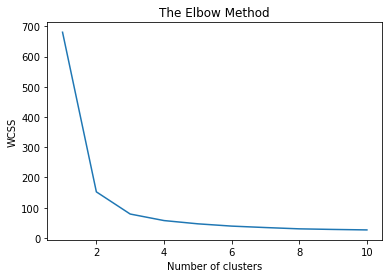

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state =40)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Using the elbow method, we can see that the optimal number of clusters here is <strong> three </strong> .

## IV.Training the K-Means model on the dataset

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## V. Visualising the clusters

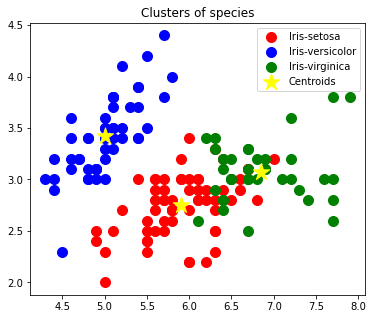

In [12]:
plt.figure(figsize=(6,5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids', marker="*")
plt.title('Clusters of species')
plt.legend()
plt.show()

# Hierarchial Model

## VI. Using the dendrogram to find the optimal number of clusters

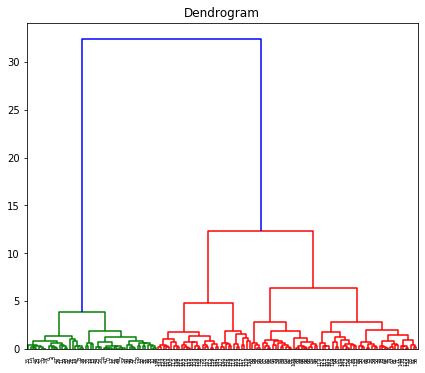

In [30]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(7,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.show()

Using the Dendrogram, we can see that the optimal number of clusters is <strong>three </strong>.

## VII. Training the Hierarchical Clustering model on the dataset 

In [16]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

## VIII. Visualising the clusters

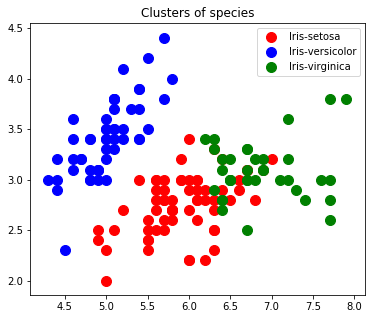

In [32]:
plt.figure(figsize=(6,5))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.title('Clusters of species')
plt.legend()
plt.show()

Therefore, it's clear that <strong>three </strong>is the optimal number of clusters.